# Kmeans Algorithms using Apache SystemML

This notebook shows:
- Install SystemML Python package and jar file
  - pip
- Example 1: Market Segmentation
  - SystemML script to generate a random matrix, perform matrix multiplication, and compute the sum of the output
  - Examine execution plans, and increase data size to obverve changed execution plans
- Example 2: Color Palette/theme generator Using Kmeans

### This notebook is supported with SystemML 0.14.0 and above.

In [1]:
!pip show systemml

Name: systemml
Version: 1.0.0
Summary: Apache SystemML is a distributed and declarative machine learning platform.
Home-page: http://systemml.apache.org/
Author: Apache SystemML
Author-email: dev@systemml.apache.org
License: Apache 2.0
Location: /Users/stc/anaconda3/lib/python3.6/site-packages
Requires: scipy, pandas, numpy, Pillow


### Import SystemML API

In [1]:
# Create SystemML MLContext
from systemml import MLContext, dml  # pip install systeml

ml = MLContext(sc)


print ("Spark Version:" + sc.version)
print ("SystemML Version:" + ml.version())
print ("SystemML Built-Time:"+ ml.buildTime())

Spark Version:2.1.1
SystemML Version:1.0.0-SNAPSHOT
SystemML Built-Time:2017-08-02 18:14:50 UTC


### Import numpy and define some helper functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt


# Example 1: Market Segmentation Using Kmeans

\begin{equation}
J = \sum_{n=1}^{N} \sum_{k=1}^{K} r_{nk} ||x_n - \mu_k||^2
\label{eqn:kmeans_objective_function}
\end{equation}

### Generate 2-D data which simulates pants sizes for women customers

In [10]:
small = np.random.randn(30, 2) + 25
medium = np.random.randn(50, 2)+ 20
large = np.random.randn(100, 2) + 28
pants = np.vstack([small, medium, large])
pants.shape

(180, 2)

### Initialization for Kmeans Algorithm

In [11]:
initial = np.array([[20,20],[25,25],[30,30]])

### SystemML script to perform Kmeans Algorithm using just Lloyd's method alone
#### The user should pass initial starting points for k number of clusters as a matrix/numpy array
#### The user should also pass the data to the algorithm

In [12]:
script_kmeans = '''
    source("/Users/stc/Desktop/systemml/scripts/algorithms/Kmeans-functional.dml") as km
    [centroid, assignments] = km::lloyd_iteration(data,initial_centers)
'''
out = ('centroid','assignments')
prog = (dml(script_kmeans).input(data =pants,initial_centers = initial).output(*out))

centroid, assignments = ml.execute(prog).get(*out)

### SystemML script to perform Kmeans Algorithm 
#### The user should pass data, k number of clusters, initialization type, and number of restarts to kmeans_cluster function
#### Initilization types: 1- random, 2- kmeans++, 3- first 1:k

In [9]:
script_kmeans = '''
    source("/Users/stc/Desktop/systemml/scripts/algorithms/Kmeans-functional.dml") as km
    [centroid, assignments, objective] = km::kmeans_cluster(data, k, init_type, num_restarts)
'''
out = ('centroid','assignments','objective')
prog = (dml(script_kmeans).input(data =pants,k = 3, init_type = 2,num_restarts = 100).output(*out))

centroid, assignments, objective = ml.execute(prog).get(*out)

#### The Kmeans Algorithm will return the dimensions/coordinates for each cluster k and the cluster assignment for each example i.

In [15]:
data = centroid.toNumPy()
example_assignments = assignments.toNumPy()
print(data)
#print("-----------------------------------------")
#print(np.hstack([example_assignments,pants]))

color= ['red' if a == 1 else 'green' if a == 2 else 'blue' for a in example_assignments]
#color
data.shape

[[ 20.29791476  19.96619372]
 [ 24.83837345  25.05722454]
 [ 28.15261025  28.05126734]]


(3, 2)

#### Visualization for of raw data and centroids for each cluster. Rather than making custom pants sizes, the company can manufacture pants sizes with the returned cluster centroids where each size can then be Small, Medium, and Large.

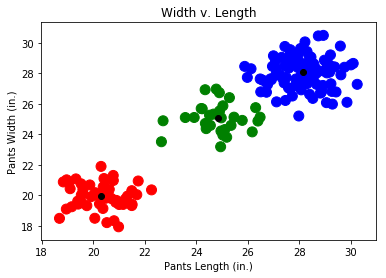

In [14]:
plt.plot(data[:,0],data[:,1],'ko')


plt.scatter(pants[:,0], pants[:,1], s=100, c =color)
plt.xlabel('Pants Length (in.)')
plt.ylabel('Pants Width (in.)')
plt.title('Width v. Length')
plt.show()

# Example 2: Color Palette/theme generator Using Kmeans

### Import helper packages and grab an image

In [59]:
from PIL import Image
im = Image.open('/Users/stc/Pictures/paletteR4.jpg')

### Display the image

In [12]:
im.show()

### Convert image to a list with RGB values

In [60]:
pixels = list(im.getdata())

### Convert list to numpy array and do any data preprocessing

In [61]:
pixels = np.asarray(pixels)
#print(pixels.shape)

#pixels = pixels[0:2700]
print(pixels.shape)
pixels = pixels[~np.isnan(pixels).any(axis=1)]
#print(pixels)

(247950, 3)


In [47]:
initial = np.array([[100,100,100],
                    [122,124,124],
                    [200,200,200]])

In [48]:
script_kmeans = '''
    source("/Users/stc/Desktop/systemml/scripts/algorithms/Kmeans-functional.dml") as km
    [centroid, assignments] = km::lloyd_iteration(data,initial_centers)
'''
out = ('centroid','assignments')
prog = (dml(script_kmeans).input(data =pixels,initial_centers = initial).output(*out))

centroid, assignments = ml.execute(prog).get(*out)

In [ ]:
script_kmeans = '''
    source("/Users/stc/Desktop/systemml/scripts/algorithms/Kmeans-functional.dml") as km
    [centroid, assignments, objective] = km::kmeans_cluster(data, k, init_type, num_restarts)
'''
out = ('centroid','assignments','objective')
prog = (dml(script_kmeans).input(data =pixels,k = 20, init_type = 2,num_restarts = 1).output(*out))

centroid, assignments, objective = ml.execute(prog).get(*out)

In [53]:
data2 = centroid.toNumPy()
example_assignments2 = assignments.toNumPy()
print(data2)
print(example_assignments2)

[[ 109.31736527   96.19760479   81.25149701]
 [ 131.89247312  100.34408602   80.16129032]
 [ 114.85915493  107.18309859   93.47887324]
 [ 103.52631579   87.22105263   71.06315789]
 [ 163.54644809  131.83060109  111.30601093]
 [ 135.45695364  123.8013245   112.49668874]
 [ 118.54074074   89.88888889   70.6962963 ]
 [ 137.98843931  115.86705202   99.16184971]
 [ 150.91616766  118.83832335   96.43712575]
 [ 127.70618557  108.6185567    93.21134021]
 [ 146.44247788  125.90265487  110.0619469 ]
 [ 148.42647059  135.86764706  124.30882353]
 [ 126.36781609  115.66666667  103.54022989]
 [ 119.7287234   100.48404255   84.70212766]
 [ 177.11578947  148.13684211  127.02105263]
 [ 105.10958904   78.49315068   57.69863014]
 [ 188.56097561  162.17073171  141.75609756]
 [ 141.40740741  109.82407407   88.01851852]
 [ 157.34883721  125.68604651  104.58139535]
 [ 169.7202381   139.32738095  118.75      ]]
[[ 10.]
 [ 19.]
 [ 20.]
 ..., 
 [  2.]
 [  7.]
 [ 18.]]


In [54]:
data2 = np.round(data2)
data2 =data2.astype(int)
print(data2)


[[109  96  81]
 [132 100  80]
 [115 107  93]
 [104  87  71]
 [164 132 111]
 [135 124 112]
 [119  90  71]
 [138 116  99]
 [151 119  96]
 [128 109  93]
 [146 126 110]
 [148 136 124]
 [126 116 104]
 [120 100  85]
 [177 148 127]
 [105  78  58]
 [189 162 142]
 [141 110  88]
 [157 126 105]
 [170 139 119]]


In [55]:
from PIL import Image, ImageFont, ImageDraw
width = 500
height = 400
im = Image.new('RGB', (width,height), (255,255,0))
dr = ImageDraw.Draw(im)

data2 = tuple(map(tuple,data2))


#print(data2)
i = 0
x0 = 0
y0 = 0
x1 = 100
y1 = 100
shift = 100
for row in data2:
    box_color = ('#%02x%02x%02x' % row)
    dr.rectangle(((x0,y0),(x1,y1)), fill=box_color, outline = "black")
    x0 += shift
    y0 += 0
    x1 += shift
    y1 += 0
    #print("i: ",i, " x: ",x," y ",y, " box color ", box_color)
    i+=1
    if(x0==width):
        x0 = 0
        x1 =100
        y0 = y0+100
        y1 = y1 +100
    

im.show()